<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 6.3
# *KNN classification Lab*

**In this lab, we will:**
- Practice KNN classification on a dataset of breast cancer.
- Predict the `diagnoosis` of a patient from predictor variables of your choice.

### 1. Load Data

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter) b) texture (standard deviation of gray-scale values) c) perimeter d) area e) smoothness (local variation in radius lengths) f) compactness (perimeter^2 / area - 1.0) g) concavity (severity of concave portions of the contour) h) concave points (number of concave portions of the contour) i) symmetry j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [60]:
# IMPORT LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.preprocessing as pre
import sklearn.neighbors as nei
import sklearn.metrics as met
import sklearn.model_selection as mod

In [3]:
breast_cancer_csv = 'breast-cancer-wisconsin-data.csv'
breast_data = pd.read_csv(breast_cancer_csv)
breast_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### 2. EDA 

Explore dataset. Clean data. Find correlation. 

### 3. Set up the `diagnosis` variable as your target. How many classes are there?

In [20]:
# ANSWER
target = breast_data['diagnosis']=='M'
y=target
target.value_counts()

False    357
True     212
Name: diagnosis, dtype: int64

### 4. What is the baseline accuracy?

In [21]:
# ANSWER
Acc = 212/357
Acc

0.5938375350140056

### 5. Choose features to be your predictor variables and set up your X.

In [22]:
# ANSWER
features = breast_data.columns[2:-1]
X = breast_data[features]

### 6. Fit a `KNeighborsClassifier` with 1 neighbor using the target and predictors.

In [27]:
X_train, X_test, y_train, y_test = mod.train_test_split(X, y, test_size=0.2)

In [28]:
# ANSWER
# Make an instance of a KNeighborsClassifier object with 1 neighbor
model = nei.KNeighborsClassifier(n_neighbors=1)
# fit on the unstandardized data:
fitted_model = model.fit(X_train,y_train)

### 7. Evaluate the accuracy of your model.
- Is it better than baseline?
- Is it legitimate?

In [30]:
# ANSWER
y_true= y_test
y_pred = fitted_model.predict(X_test)
met.accuracy_score(y_true, y_pred)
# predict the response values for the observations in X ("test the model")
# store the predicted response values

0.9210526315789473

### 8. Create a 80-20 train-test-split of your target and predictors. Refit the KNN and assess the accuracy.

In [32]:
# ANSWER
# STEP 1: split X and y into training and testing sets (using random_state for reproducibility)
X_train, X_test, y_train, y_test = mod.train_test_split(X,y, test_size=0.2)
# STEP 2: train the model on the training set (using K=1)
model = nei.KNeighborsClassifier(n_neighbors=1)
fitted_model = model.fit(X_train,y_train)
# STEP 3: test the model on the testing set, and check the accuracy
y_true= y_test
y_pred = fitted_model.predict(X_test)
met.accuracy_score(y_true, y_pred)

0.9122807017543859

### 9. Evaluate the test accuracy of a KNN where K == number of rows in the training data.

In [33]:
# ANSWER
X_train, X_test, y_train, y_test = mod.train_test_split(X,y, test_size=0.2)
# Create an instance of KNeighborsClassifier where n_neighbors = number of rows in the training data
nrows = X_train.shape[0]
model = nei.KNeighborsClassifier(n_neighbors=nrows)
# Fit Train Data
fitted_model = model.fit(X_train,y_train)
# Print accuracy_score
y_true= y_test
y_pred = fitted_model.predict(X_test)
met.accuracy_score(y_true, y_pred)

0.6491228070175439

### 10. Fit the KNN at values of K from 1 to the number of rows in the training data.
- Store the test accuracy in a list.
- Plot the test accuracy vs. the number of neighbors.

In [37]:
# ANSWER
# plot test accuracy by number of neighbors:
ac = []
nrows = X_train.shape[0]
for k in range(nrows):
    model = nei.KNeighborsClassifier(n_neighbors=k+1)
    # Fit Train Data
    fitted_model = model.fit(X_train,y_train)
    # Print accuracy_score
    y_true= y_test
    y_pred = fitted_model.predict(X_test)
    ac = ac + [met.accuracy_score(y_true, y_pred)]

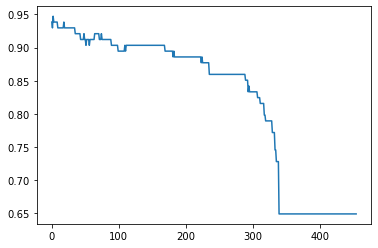

In [39]:
plt.plot(ac)

### 11. Fit KNN across different values of K and plot the mean cross-validated accuracy with 5 folds.


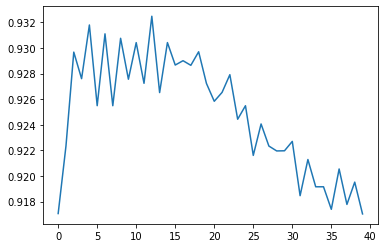

In [58]:
# ANSWER
nrows=40
mac = []
rkf = mod.RepeatedKFold(n_splits=5, n_repeats=5)
for k in range(nrows):
    acv=[]
    for train_index, test_index in rkf.split(X):
        X_train = X.iloc[train_index,:]
        X_test = X.iloc[test_index]
        y_train = y[train_index]
        y_test = y[test_index]
    
        model = nei.KNeighborsClassifier(n_neighbors=k+1)
        # Fit Train Data
        fitted_model = model.fit(X_train,y_train)
        # Print accuracy_score
        y_true= y_test
        y_pred = fitted_model.predict(X_test)
        acv = acv + [met.accuracy_score(y_true, y_pred)]
    acv = np.array(acv)
    mac = mac + [np.mean(acv)]
    
plt.plot(mac)

### 12. Standardize the predictor matrix and cross-validate across the different K.
- Plot the standardized mean cross-validated accuracy against the unstandardized. Which is better?
- Why?

In [65]:
# ANSWER
# Standarize X
X_scale = pd.DataFrame(pre.scale(X))

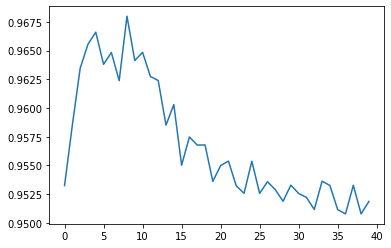

In [66]:
# ANSWER
# plot test accuracy by number of neighbors:
nrows=40
mac = []
rkf = mod.RepeatedKFold(n_splits=5, n_repeats=5)
for k in range(nrows):
    acv=[]
    for train_index, test_index in rkf.split(X_scale):
        Xs_train = X_scale.iloc[train_index,:]
        Xs_test = X_scale.iloc[test_index]
        ys_train = y[train_index]
        ys_test = y[test_index]
    
        model = nei.KNeighborsClassifier(n_neighbors=k+1)
        # Fit Train Data
        fitted_model = model.fit(Xs_train,ys_train)
        # Print accuracy_score
        ys_true= ys_test
        ys_pred = fitted_model.predict(Xs_test)
        acv = acv + [met.accuracy_score(ys_true, ys_pred)]
    acv = np.array(acv)
    mac = mac + [np.mean(acv)]
    
plt.plot(mac)

**References**

[Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/downloads/breast-cancer-wisconsin-data.zip/2)



---



---



> > > > > > > > > © 2019 Institute of Data


---



---



